In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [17]:
GroupProject =pd.read_csv(r"C:\Users\Megan\Desktop\StudentsPerformance.csv")

In [36]:
# Done By Megan Hoaes
print(GroupProject.info())
print(GroupProject.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [66]:
# Done By Martha Ndeshiyala
print(GroupProject.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [68]:
# Done By Peter Hailapa
GroupProject = GroupProject.dropna() 

In [70]:
# Done By Peter Hailapa
print(GroupProject.duplicated().sum())

0


In [72]:
# Done By Simeon Nafimane
# Find NaN values in the dataset
GroupProject.isna()

# Count NaN values in each column
GroupProject.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [74]:
# Done By Wilhem Nghiyoonanye
# Integer Series
series1 = pd.Series([1, 2], dtype=np.int64)
reindexed1 = series1.reindex([0, 1, 2])
print("Reindexed Integer Series:")
print(reindexed1)
print()

# Boolean Series
series2 = pd.Series([True, False], dtype=np.bool_)
reindexed2 = series2.reindex([0, 1, 2])
print("Reindexed Boolean Series:")
print(reindexed2)

Reindexed Integer Series:
0    1.0
1    2.0
2    NaN
dtype: float64

Reindexed Boolean Series:
0     True
1    False
2      NaN
dtype: object


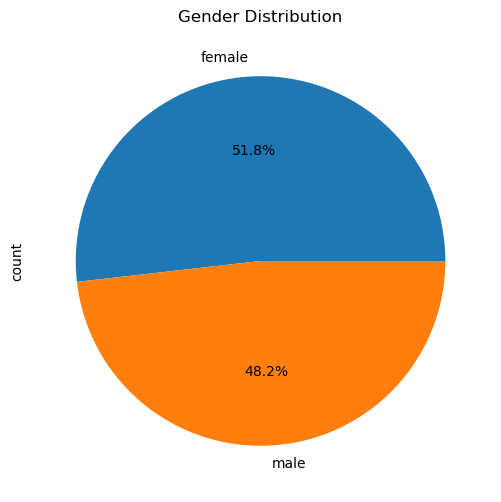

In [76]:
# Done By Mauritius Hamutenya
# Pie chart for gender distribution
plt.figure(figsize=(8, 6))
GroupProject['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


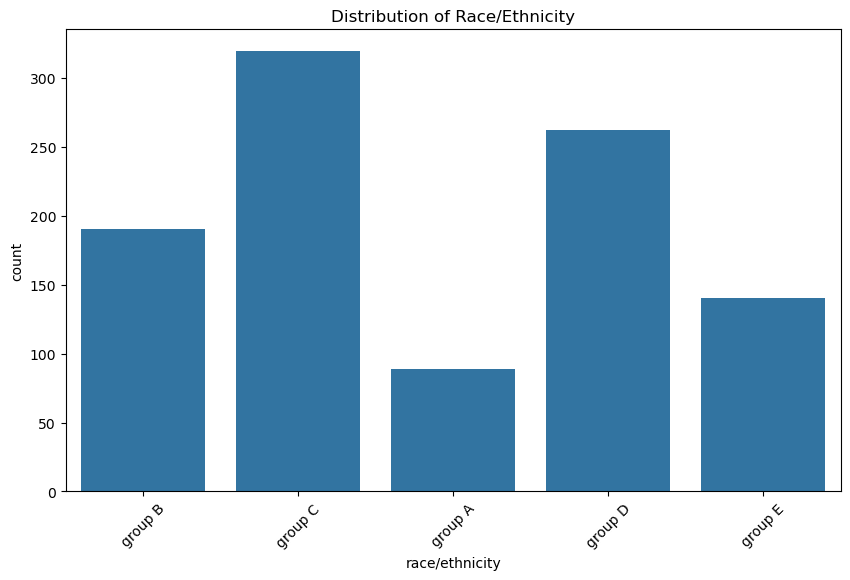

In [64]:
# Done By Peneyambeko Mwaamange
# Bar graph for race/ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='race/ethnicity', data=GroupProject)
plt.title('Distribution of Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

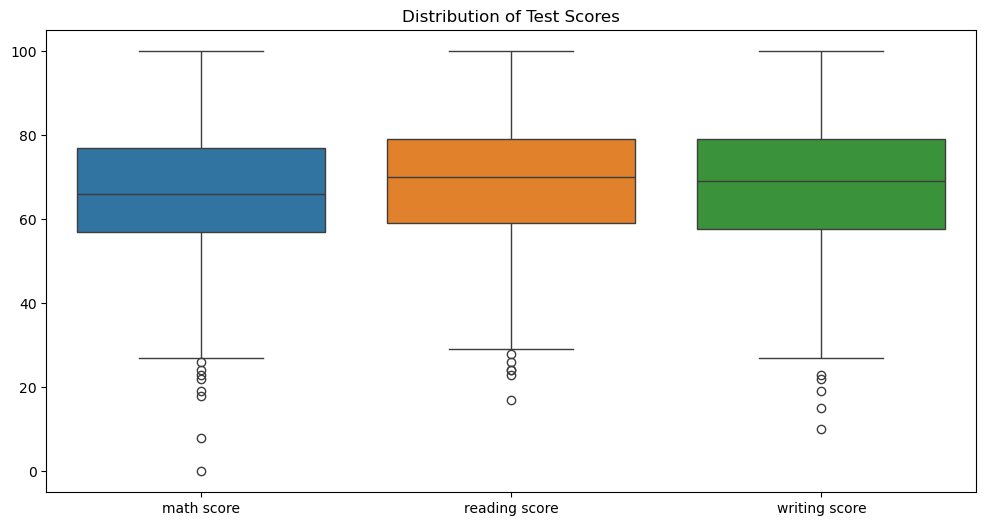

In [62]:
# Done By Emilia Ndevaama
# Box plot for test scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=GroupProject[['math score', 'reading score', 'writing score']])
plt.title('Distribution of Test Scores')
plt.show()

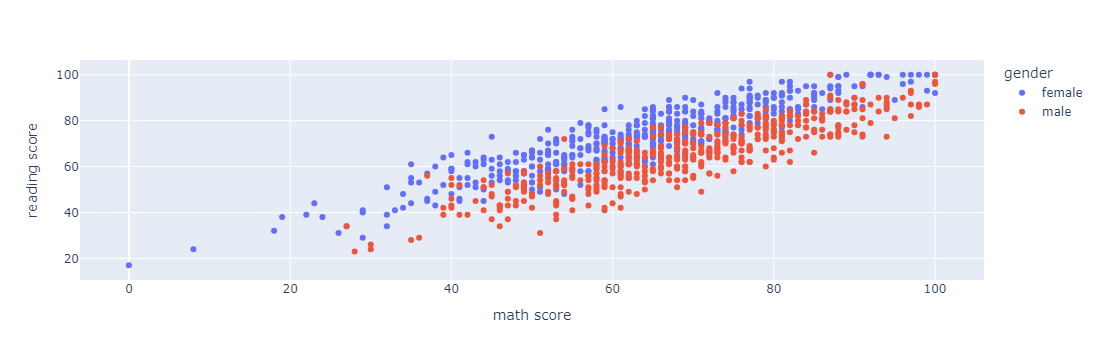

In [60]:
# Done By Twapandula Amushe
# Interactive visualization (example with Plotly)
fig = px.scatter(GroupProject, x='math score', y='reading score', color='gender',
                 hover_data=['writing score', 'race/ethnicity'])
fig.show()

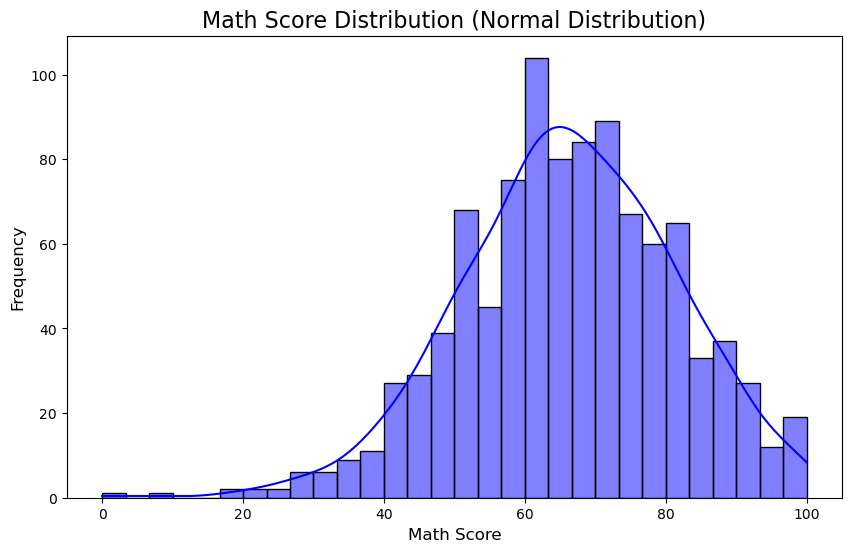

In [35]:
# Done By Peneyambeko Mwaamange
# Create a figure for the distribution plot
plt.figure(figsize=(10, 6))

# Plot the distribution of Math scores
sns.histplot(GroupProject['math score'], kde=True, color='blue', bins=30)

# Add title and labels
plt.title('Math Score Distribution (Normal Distribution)', fontsize=16)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

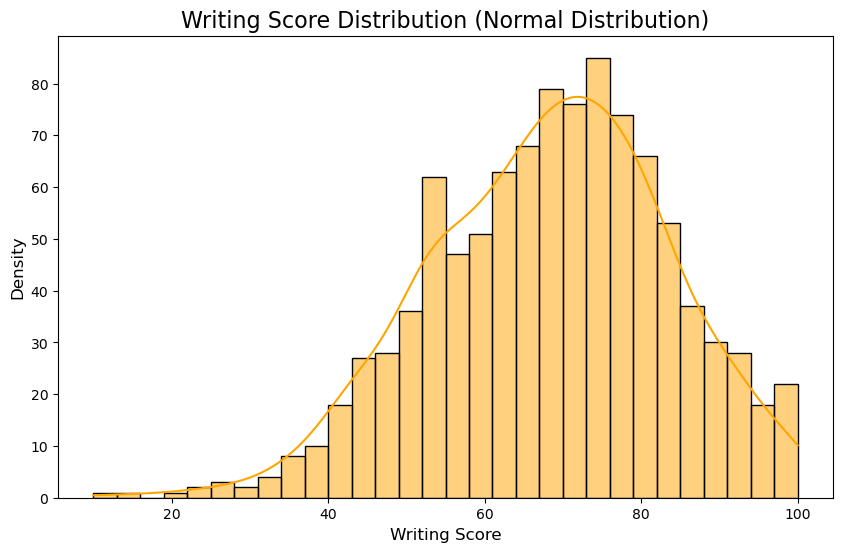

In [33]:
# Done By Megan Hoaes
# Create a figure for the writing score distribution plot
plt.figure(figsize=(10, 6))

# Plot the distribution of Writing scores
sns.histplot(GroupProject['writing score'], kde=True, color='orange', bins=30)

# Add title and labels
plt.title('Writing Score Distribution (Normal Distribution)', fontsize=16)
plt.xlabel('Writing Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

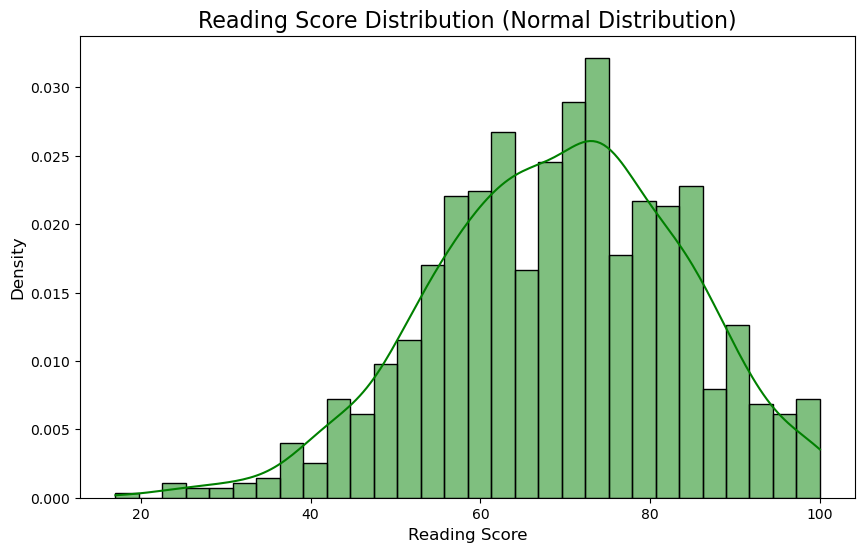

In [31]:
# Done By Mauritius Hamutenya
# Create a figure for the reading score distribution plot
plt.figure(figsize=(10, 6))

# Plot the distribution of Reading scores
sns.histplot(GroupProject['reading score'], kde=True, color='green', bins=30, stat='density', alpha=0.5)

# Add title and labels
plt.title('Reading Score Distribution (Normal Distribution)', fontsize=16)
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [58]:
# Done By Ihemba Hamutenya
# Prepare data for machine learning
X = GroupProject[['math score', 'reading score', 'writing score']]
y = GroupProject['gender']  # Assuming we're predicting gender based on scores

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (800, 3)
Shape of X_test: (200, 3)


In [56]:
# Done By Viano Tuhafeni
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of scaled data
print("\nFirst few rows of X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


First few rows of X_train_scaled:
   math score  reading score  writing score
0   -0.299452       0.030791       0.434053
1   -0.033050       0.930290       0.964701
2    0.832756       1.345443       1.163694
3   -0.366053      -0.176786      -0.162925
4    0.433153      -0.384363      -0.759904


In [54]:
# Done By Oberty Ekayo
# Train and evaluate multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("Models dictionary created successfully!")

Models dictionary created successfully!


In [16]:
# If X_train is a DataFrame, convert it to a NumPy array
X_train = X_train.values
X_test = X_test.values

In [78]:
# Done By Vianca Ipinge
# Done By Prince Kenneth
# Done By Helena Megameno
# Loop through the models and train them
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.90
              precision    recall  f1-score   support

      female       0.87      0.93      0.90        97
        male       0.93      0.86      0.89       103

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

Decision Tree Model Accuracy: 0.81
              precision    recall  f1-score   support

      female       0.78      0.82      0.80        97
        male       0.83      0.79      0.81       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Random Forest Model Accuracy: 0.86
              precision    recall  f1-score   support

      female       0.84      0.89      0.86        97
        male       0.89      0.84      0.87       103

    accuracy                           0.86       200
   macro avg     